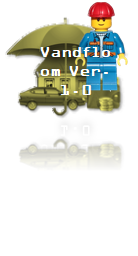

**1. Forretningsforståelse**

```
“Det første er at forstå det forretningsmæssige perspektiv grundigt. 
- Hvad ønsker kunden at opnå?
Indsaml information om forretningssituationen for organisationen. 
Dette lettere identificering af forretningsmål, men identificerer dertil resourcer, 
så som data, viden, personale og hardware resourcer, som senere kan anvendes.
Kunden har mange konkurrerende mål og begrænsninger, der skal være korrekt afstemt. 
Analytikerens mål er at afdække vigtige faktorer i starten af ​​projektet, som kan påvirke det endelige resultat. 
Forsømmelse af dette trin kan resulterer i tid anvendt på at svare rigtigt på de forkerte spørgsmål”

```
<p align = "right"> CRISP-DM 1.0</p>


**Udforskning - Ekstern Optimering**

Når vi møder addressere det eksterne markedet, kræver det et bredt perspektiv. Vores tilgang må tage hånd om større eksterne påvirkninger, som for eksempel: 




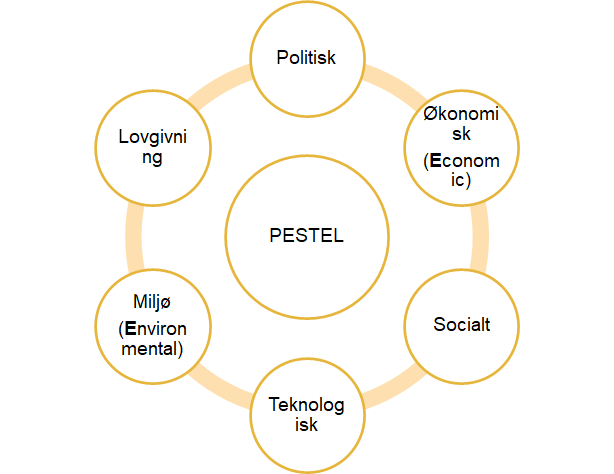


Ved rekonfigurere processer, kan hospitalvæsens typisk optimeres.

Derfor kan det være nødvendigt at foretage en interessent-drevet behovs analyse.


**Mulighedsrum for drifttiltag**

Hvilken fase ønsker jeg at forbedre?

*   **Kontrol** - Hvad er hændt og hvad foregår? Udgangspunkt er fakta, data og værdier, som giver en detajleret analyse.
*   **Diagnose** - Hvorfor er hændelsen indtraffet? Eksaminering af den beskrevende viden og opfordring til årsagsidentification
*   **Forudsigelse** - Hvad vil indtræffe? Faktorer og fokus på fremtidigt udfald.
*   **Prognose** - Hvilkle aktioner burde gøres og hvorfor? Med fokus på beslutningstagning og forbedringer.

**Udfordring: Proprietære løsninger og retningslinjer**
Kommercielle organisationer foretrækker lukkede løsninger, som tillader proprietære løsninger. Til afgørelse af problemmer med en risikoprofil, foretrækkes oftest mere åbne løsninger, end lukkede løsninger. Mennesker er uperfekte i deres vurdering, men kan sometide bedre foretolke information under ændrende omstændigheder. Derfor kræver analyse løsninger analytikker, som kan foretolke resultater



<br>
<br>
<br>
<br>
</br>

Data fra en vejrstation tæt på Bergen kan anvendes til at få en ide om nedbørsmængde

In [1]:
#@title nedbørs mængde i Bergen
import pandas as pd
url="https://lmt.nibio.no/agrometbase/showweatherdata.php?weatherstation=54&elementMeasurementTypes%5B%5D=297&loginterval=3&valuetype=value_controlled&date_start=2016-02-27&date_end=2020-10-09&format=csv&separator=comma&adjustForDST=true"
weather_data  = pd.read_csv(url,header=0,delimiter=",") 

weather_data

,Time measured,Nedbør (RR)
0,2016-02-27 00:00:00+01,0.0
1,2016-02-28 00:00:00+01,0.0
2,2016-02-29 00:00:00+01,0.0
3,2016-03-01 00:00:00+01,1.2
4,2016-03-02 00:00:00+01,0.3
...,...,...
1682,2020-10-05 00:00:00+02,1.2
1683,2020-10-06 00:00:00+02,0.0
1684,2020-10-07 00:00:00+02,0.0
1685,2020-10-08 00:00:00+02,4.6


vi kan indhente et kort for fylker i Norge til senere brug

In [2]:
#@title Fylker i Norge
import altair as alt


norway_counties ='https://raw.githubusercontent.com/kjhealy/norway/master/geojson/fylker.geojson'




norway =alt .  Chart ( norway_counties ) .  mark_geoshape (stroke= "black",fill="lightgrey") .  encode ( #fill="lightgray",
    
    
  
).project(
    type= 'mercator',
    scale= 700,                          # Magnify
    center= [16,65],  

) .  properties (
     width = 400 ,
     height = 500
 )

#navn


norway

alt.Chart(...)

Ved at anvende "unit gamma distribution" kan vi modellere stigning og aftag af vandflooming

Følgende datakilder kan anvendes for at få mere indsigt:

*   https://www.imesa.org.za/wp-content/uploads/2016/01/SARF-Detention-Example-Feb_08-rev-3_1-protected.xls
*   https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/stelprdb1083020.pdf




In [3]:
#@title Gamma fordeling

import altair as alt
import pandas as pd



p_value=alt.binding_range(min=-10, max=10, step=0.1,name="p_value")
theta=alt.binding_range(min=0, max=5, step=0.1,name="theta")
gamma=alt.binding_range(min=0, max=5, step=0.1,name="gamma")
k=alt.binding_range(min=0, max=5, step=0.1,name="k")


data=pd.DataFrame()
data['x']=list(range(0,2000))
data['x']=data['x']/100

p_value_chart=alt.Chart(data).mark_area().encode(
    x='x:Q',
    y='f_x:Q',
    color='area_color:N',
).properties(title='p_value',width=600)


params = alt.Chart(data).mark_text(align='left', color="orange").encode(
    x=alt.value(10),  # pixels from left
    y=alt.value(0),  # pixels from top
    text='sum(p_area):Q'
)

brush = alt.selection(type='interval', encodings=['x'], name='sel')


params_std = alt.Chart(data).mark_text(align='left', color="red").encode(
    x=alt.value(10),  # pixels from left
    y=alt.value(10),  # pixels from top
    text='sum(std_area):Q'
)


text = alt.Chart(data).transform_filter(
    brush
).transform_aggregate(
    total='sum(f_x)'
).transform_calculate(
    date_range="sel.x ? sel.x[0] + ' to ' + sel.x[1] : 'all'",
    text="'Areal' + format(datum.total, '.1f')"  
).mark_text(
    align='left',
    baseline='top',
).encode(
    x=alt.value(5),
    y=alt.value(15),
    text=alt.Text('text:N'),
)


(p_value_chart+params+text).transform_calculate(
    p_value='p_value.p_value*1',
    k='k.k*1',
    theta='theta.theta*1',
    gamma='gamma.gamma*1',

    area_color='if(datum.x>datum.p_value,0.5,0)',
    std_area='if(datum.standard_deviation>datum.x&&datum.x>=0,datum.f_x,0)',
    f_x='1/(datum.gamma*datum.k*pow(datum.theta,datum.k))*pow(datum.x,datum.k-1)*exp(-datum.x/datum.theta)',
    
    #pow(datum.x,datum.k-1)*exp(-datum.x/datum.theta)/(pow(datum.theta,datum.k)*datum.gamma*datum.k)',
    #f_x='pow(datum.x,datum.k-1)*exp(-datum.x/datum.theta)/(pow(datum.theta,datum.k)*datum.gamma*datum.k)',
    #f_x='1/(datum.standard_deviation*sqrt(2*PI))*exp(-1/2*pow((datum.x-datum.expectation)/datum.standard_deviation,2))',
    p_area='if(datum.x>=datum.p_value,datum.f_x,0)',
).add_selection(
    alt.selection_single(fields=['p_value'], bind=p_value , name='p_value', init={"p_value":'0'}),
    alt.selection_single(fields=['theta'], bind=theta , name='theta', init={"theta":'1'}),
    alt.selection_single(fields=['k'], bind=k , name='k', init={"k":'2'}),
    alt.selection_single(fields=['gamma'], bind=gamma , name='gamma', init={"gamma":'1'}),
).properties(title='gamma distribution - shock og vibrationer',width=600).add_selection(
    brush
)



alt.LayerChart(...)

Vi kan hente havstandsniveau uden for Norge's kyster

In [5]:
#@title installation af xml læser
!pip install pandas_read_xml


     |████████████████████████████████| 133kB 2.9MB/s 
     |████████████████████████████████| 63.8MB 59kB/s 
     |████████████████████████████████| 512kB 43.1MB/s 
ERROR: kaggle 1.5.8 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.10 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


In [6]:
#@title indlæsning af havstand
import pandas_read_xml as pdx
import pandas as pd
url="http://api.sehavniva.no/tideapi.php?lat=59.911491&lon=10.757933&fromtime=2019-01-01T00%3A00&totime=2019-12-31T00%3A00&datatype=all&refcode=cd&place=Oslo&file=&lang=en&interval=60&dst=0&tzone=&tide_request=locationdata"

df = pdx.read_xml(url, ['tide', 'locationdata', 'data'])
df

,@type,@unit,waterlevel
0,observation,cm,"[{'@value': '108.9', '@time': '2019-01-01T00:0..."
1,prediction,cm,"[{'@value': '76.3', '@time': '2019-01-01T00:00..."
2,weathereffect,cm,"[{'@value': '32.7', '@time': '2019-01-01T00:00..."


Vi kan udvælge relevante kolonner

In [8]:
#@title valg af kolonner
source=pd.DataFrame.from_dict(df.waterlevel[0])
source


,@value,@time,@flag
0,108.9,2019-01-01T00:00:00+01:00,obs
1,127.7,2019-01-01T01:00:00+01:00,obs
2,138.0,2019-01-01T02:00:00+01:00,obs
3,137.6,2019-01-01T03:00:00+01:00,obs
4,126.3,2019-01-01T04:00:00+01:00,obs
...,...,...,...
8732,115.1,2019-12-30T20:00:00+01:00,obs
8733,118.4,2019-12-30T21:00:00+01:00,obs
8734,114.6,2019-12-30T22:00:00+01:00,obs
8735,105.4,2019-12-30T23:00:00+01:00,obs


Kolonnenavne kræver gennavngivning for at kunne håndteres

In [9]:
#@title formatering af kolonnenavne
column_names=['Value','Timestamp','Flag']

test=source
col_dict = {test.columns[0]: column_names[0],test.columns[1]: column_names[1],test.columns[2]: column_names[2]}   ## key→old name, value→new name
test.columns = [col_dict.get(x, x) for x in test.columns]
test.columns
source=test
source

,Value,Timestamp,Flag
0,108.9,2019-01-01T00:00:00+01:00,obs
1,127.7,2019-01-01T01:00:00+01:00,obs
2,138.0,2019-01-01T02:00:00+01:00,obs
3,137.6,2019-01-01T03:00:00+01:00,obs
4,126.3,2019-01-01T04:00:00+01:00,obs
...,...,...,...
8732,115.1,2019-12-30T20:00:00+01:00,obs
8733,118.4,2019-12-30T21:00:00+01:00,obs
8734,114.6,2019-12-30T22:00:00+01:00,obs
8735,105.4,2019-12-30T23:00:00+01:00,obs


Havstanden kan nu plottes

In [10]:
#@title graf af havstand for Oslo
import altair as alt

alt.data_transformers.disable_max_rows()
alt.Chart(source).mark_line().encode(

    alt.X('Timestamp:T', axis=alt.Axis(title='Vandstand Oslo)',titleColor='Blue')),
    y='Value:Q'
).interactive().properties(width=1000,height=200)
#https://www.aftenposten.no/osloby/i/g7Rnr5/trafikkproblemer-og-store-oversvoemmelser-etter-kraftig-uvaer-i-oslo

alt.Chart(...)

Følgnende datakilder kan anvendes for at udvikle løsningen:

http://hydrology.irpi.cnr.it/download-area/midsc-code/

file:///C:/Users/Admin/Downloads/FINAL_RUNOFF_MODELS_SITTERSON%20508%20REVISED.PDF


https://www.hec.usace.army.mil/confluence/hmsdocs/hmstrm/surface-runoff/user-specified-unit-hydrograph

https://echo2.epfl.ch/VICAIRE/mod_1b/chapt_4/text.htm


https://www.bbc.co.uk/scotland/education/int/geog/rivers/hydrographs/index.shtml


https://www.sciencedirect.com/science/article/pii/0022169481902109

https://reader.elsevier.com/reader/sd/pii/0022169481902109?token=8C47223EE3AEE6521F17158F6436902B33FC4F5D3242F7BF53AB95ECC56CB868B750F9132743198B7609076E36886146

UHconvolution .xls
SARF-Detention-Example

wrd-scrc_558230_7

Overland flow
Through flow
Storm Flow


245287273_Simplified_Two-Parameter_Gamma_Distribution_for_Derivation_of_Synthetic_Unit_Hydrograph

https://npg.copernicus.org/preprints/npg-2020-1/npg-2020-1.pdf


https://www.tandfonline.com/doi/pdf/10.1623/hysj.2005.50.6.1053

https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/stelprdb1083020.pdf